In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
gdp = pd.read_csv('/Users/user/Downloads/nigeria_real_gdp_fred.csv')
# Rename the columns to match what our code expects
gdp = gdp.rename(columns={
    'observation_date': 'Date',
    'RGDPNANGA666NRUG': 'Real_GDP'
})

# Preview the result
print(gdp.head())

         Date      Real_GDP
0  1950-01-01  78915.187500
1  1951-01-01  83720.429688
2  1952-01-01  89312.117188
3  1953-01-01  91487.789062
4  1954-01-01  99085.976562


In [14]:
gdp

,Date,Real_GDP
0,1950-01-01,7.891519e+04
1,1951-01-01,8.372043e+04
2,1952-01-01,8.931212e+04
3,1953-01-01,9.148779e+04
4,1954-01-01,9.908598e+04
...,...,...
65,2015-01-01,9.739478e+05
66,2016-01-01,9.582004e+05
67,2017-01-01,9.660054e+05
68,2018-01-01,9.846349e+05


In [16]:
gdp.info

<bound method DataFrame.info of           Date      Real_GDP
0   1950-01-01  7.891519e+04
1   1951-01-01  8.372043e+04
2   1952-01-01  8.931212e+04
3   1953-01-01  9.148779e+04
4   1954-01-01  9.908598e+04
..         ...           ...
65  2015-01-01  9.739478e+05
66  2016-01-01  9.582004e+05
67  2017-01-01  9.660054e+05
68  2018-01-01  9.846349e+05
69  2019-01-01  1.006237e+06

[70 rows x 2 columns]>

In [18]:
gdp.describe()

,Real_GDP
count,7.000000e+01
mean,3.547174e+05
std,2.686603e+05
min,7.891519e+04
25%,1.515137e+05
50%,2.714122e+05
75%,4.191651e+05
max,1.006237e+06


In [20]:
gdp.shape

(70, 2)

In [22]:
gdp.isnull().sum()

Date        0
Real_GDP    0
dtype: int64

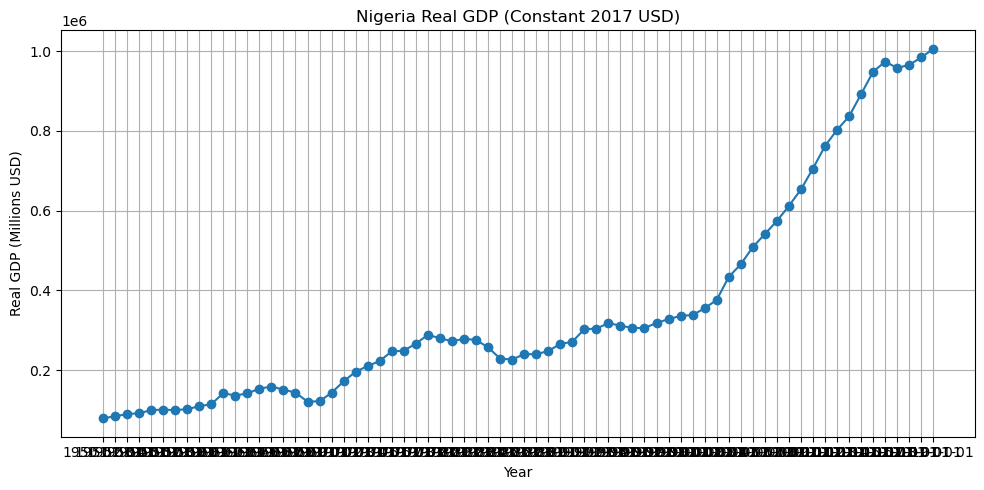

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(gdp['Date'], gdp['Real_GDP'], marker='o')
plt.title('Nigeria Real GDP (Constant 2017 USD)')
plt.xlabel('Year')
plt.ylabel('Real GDP (Millions USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
pre_covid = gdp[gdp['Date'] < '2020-01-01']
during_covid = gdp[(gdp['Date'] >= '2020-01-01') & (gdp['Date'] <= '2021-12-31')]

print("Pre‑COVID average GDP:", pre_covid['Real_GDP'].mean())
print("During‑COVID average GDP:", during_covid['Real_GDP'].mean())

Pre‑COVID average GDP: 354717.4049107143
During‑COVID average GDP: nan


In [30]:
# Compute growth rate as percentage change, Year-over-Year (YoY) Growth Rate
gdp['YoY_Growth'] = gdp['Real_GDP'].pct_change() * 100

# Preview
print(gdp[['Date', 'Real_GDP', 'YoY_Growth']].tail())

          Date      Real_GDP  YoY_Growth
65  2015-01-01  9.739478e+05    2.652691
66  2016-01-01  9.582004e+05   -1.616860
67  2017-01-01  9.660054e+05    0.814541
68  2018-01-01  9.846349e+05    1.928515
69  2019-01-01  1.006237e+06    2.193871


ConversionError: Failed to convert value(s) to axis units: [Timestamp('2020-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00')]

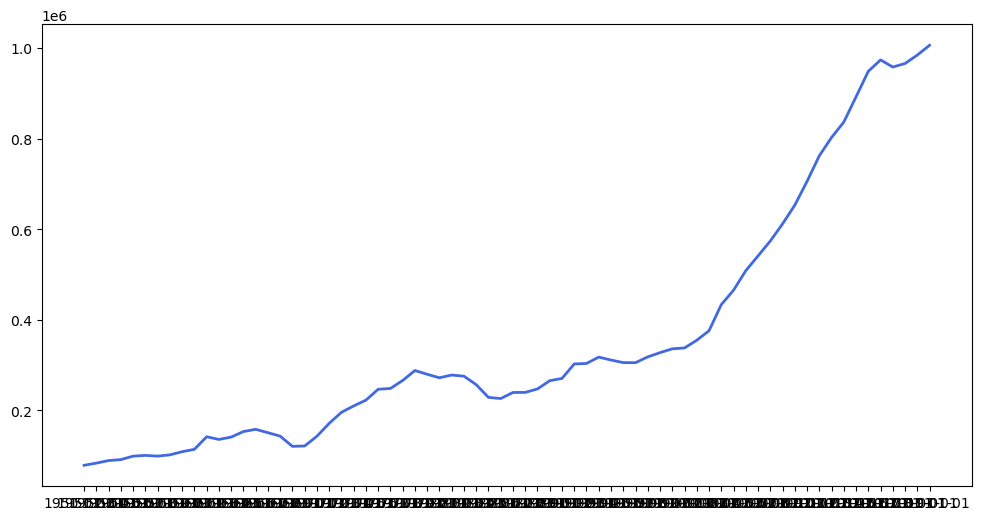

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(gdp['Date'], gdp['Real_GDP'], color='royalblue', linewidth=2, label='Real GDP')
plt.axvspan(pd.to_datetime('2020'), pd.to_datetime('2021'), color='orange', alpha=0.2, label='COVID Period')

plt.title('Nigeria Real GDP Over Time (Highlighting COVID Period)')
plt.xlabel('Date')
plt.ylabel('Real GDP (Billions)')
plt.legend()
plt.grid(True)
plt.show()



ConversionError: Failed to convert value(s) to axis units: [Timestamp('2020-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00')]

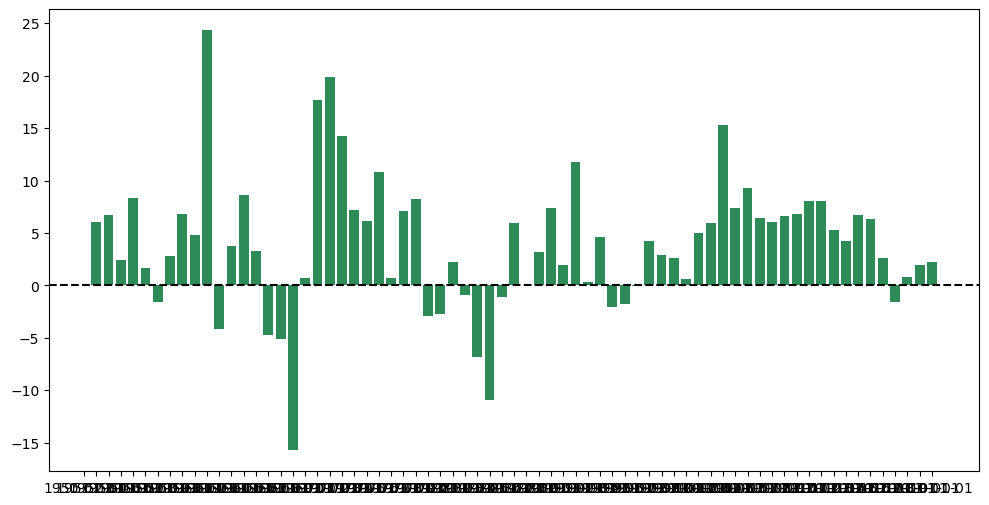

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(gdp['Date'], gdp['YoY_Growth'], color='seagreen')
plt.axhline(0, color='black', linestyle='--')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'), color='red', alpha=0.15)

plt.title('Year-over-Year GDP Growth Rate (%)')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.grid(axis='y')
plt.show()